<a href="https://colab.research.google.com/github/svhenrique/house-prices-predictor/blob/main/HousePricesPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando Bibliotécas necessárias

In [1]:
# montando drive (para o colab)
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# importando bibliotecas necessárias
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


## Lendo dados

In [3]:
# dados em pasta 
pasta = '/content/drive/My Drive/datasets/house-prices/'

In [4]:
# lendo dados de treino e teste
train_data = pd.read_csv(pasta + 'train.csv')
test_data = pd.read_csv(pasta + 'test.csv')

## Limpeza e organização dos dados



In [5]:
# mostrando shape resultante
print('Train data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)

Train data shape:  (1460, 81)
Test data shape:  (1459, 80)


### Limpando dados

In [6]:
# removendo dados nan de train_data
train_data.dropna(how='any',axis=0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [7]:
# removendo dados nan de test_data
test_data.dropna(how='any',axis=0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


É possível observar que todas as linhas foram apagadas, isso indica que existem valores "nan" em todas as instâncias. Entretanto, isso é uma confusão que o pandas fez ao ler o atributo "NA" de "Alley", que significa "No alley access".

In [8]:
# observando as features com maiores ocorrências de nan 
train_data.isnull().sum()[train_data.isnull().sum() > len(train_data)/2]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

Logo, essas 4 features podem ter valores normais que são lidos como nan.

Eu irei seguir o glossário de valores para identificar atributos como "NA" que realmente significam algo, evitando perca de dados.

In [9]:
# Existem valores NA, que são confundidos com nans, sobre nas colunas a seguir
print(train_data['Alley'].unique())
print(train_data['PoolQC'].unique())
print(train_data['Fence'].unique())
print(train_data['MiscFeature'].unique())
print(train_data['BsmtQual'].unique())
print(train_data['BsmtCond'].unique())
print(train_data['BsmtExposure'].unique())
print(train_data['BsmtFinType1'].unique())
print(train_data['BsmtFinType2'].unique())
print(train_data['FireplaceQu'].unique())
print(train_data['GarageType'].unique())
print(train_data['GarageFinish'].unique())
print(train_data['GarageQual'].unique())
print(train_data['GarageCond'].unique())

[nan 'Grvl' 'Pave']
[nan 'Ex' 'Fa' 'Gd']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [10]:
# inserindo o valor "NA" (No alley access) para os nan em Alley de treino e teste
train_data['Alley'] = train_data['Alley'].fillna('NA')
test_data['Alley'] = test_data['Alley'].fillna('NA')

In [11]:
# inserindo o valor "NA" (No Pool) para os nan em Alley de treino e teste
train_data['PoolQC'] = train_data['PoolQC'].fillna('NA')
test_data['PoolQC'] = test_data['PoolQC'].fillna('NA')

In [12]:
# inserindo o valor "NA" (No Fencel) para os nan em PoolQC de treino e teste
train_data['Fence'] = train_data['Fence'].fillna('NA')
test_data['Fence'] = test_data['Fence'].fillna('NA')

In [13]:
# inserindo o valor "NA" (None) para os nan em PoolQC de treino e teste
train_data['MiscFeature'] = train_data['MiscFeature'].fillna('NA')
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('NA')

In [14]:
# inserindo o valor "NA" (No Basement) para os nan em BsmtQual de treino e teste
train_data['BsmtQual'] = train_data['BsmtQual'].fillna('NA')
test_data['BsmtQual'] = test_data['BsmtQual'].fillna('NA')

In [15]:
# inserindo o valor "NA" (No Basement) para os nan em BsmtCond de treino e teste
train_data['BsmtCond'] = train_data['BsmtCond'].fillna('NA')
test_data['BsmtCond'] = test_data['BsmtCond'].fillna('NA')

In [16]:
# inserindo o valor "NA" (No Basement) para os nan em BsmtExposure de treino e teste
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna('NA')
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna('NA')

In [17]:
# inserindo o valor "NA" (No Basement) para os nan em BsmtFinType1 de treino e teste
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('NA')
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna('NA')

In [18]:
# inserindo o valor "NA" (No Basement) para os nan em BsmtFinType2 de treino e teste
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('NA')
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna('NA')

In [19]:
# inserindo o valor "NA" (No Fireplace) para os nan em FireplaceQu de treino e teste
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('NA')
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('NA')

In [20]:
# inserindo o valor "NA" (No Garage) para os nan em GarageType de treino e teste
train_data['GarageType'] = train_data['GarageType'].fillna('NA')
test_data['GarageType'] = test_data['GarageType'].fillna('NA')

In [21]:
# inserindo o valor "NA" (No Garage) para os nan em GarageFinish de treino e teste
train_data['GarageFinish'] = train_data['GarageFinish'].fillna('NA')
test_data['GarageFinish'] = test_data['GarageFinish'].fillna('NA')

In [22]:
# inserindo o valor "NA" (No Garage) para os nan em GarageQual de treino e teste
train_data['GarageQual'] = train_data['GarageQual'].fillna('NA')
test_data['GarageQual'] = test_data['GarageQual'].fillna('NA')

In [23]:
# inserindo o valor "NA" (No Garage) para os nan em GarageCond de treino e teste
train_data['GarageCond'] = train_data['GarageCond'].fillna('NA')
test_data['GarageCond'] = test_data['GarageCond'].fillna('NA')

In [24]:
# removendo os dados nan verdadeiros dos datasets
train_data = train_data.dropna(how='any',axis=0)
test_data = test_data.dropna(how='any',axis=0)

In [25]:
# mostrando shape resultante
print('Train data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)

Train data shape:  (1120, 81)
Test data shape:  (1139, 80)


In [26]:
# removendo coluna id (pois ela é inútil para a criação do modelo) 
train_data.drop('Id', inplace=True, axis=1)
test_data.drop('Id', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Organizando dados

In [27]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [28]:
column = 'MSZoning'
print(list(train_data[column].unique()))
print(list(test_data[column].unique()))

['RL', 'RM', 'C (all)', 'FV', 'RH']
['RH', 'RL', 'RM', 'FV', 'C (all)']


In [29]:
categorical_columns = []

# transformando dados categóricos em dados numéricos

columns = list(train_data.columns)
columns.remove('SalePrice')

for column in columns:

  
  data1 = train_data[column].unique()
  data2 = list(test_data[column].unique())

  # pegando valores diferentes dos dois datasets e juntando
  for data in data2:
    if data not in data1:
      data1 = np.append(data1, data)

  if data1.dtype not in [np.int64, np.float64]:

    # separando colunas categóricas 
    categorical_columns.append(column)

    simbols = list(range(data1.shape[0]))
    print()
    print(column)
    print(data1)
    print(simbols)
    print()

    train_data[column].replace(list(data1), simbols, inplace=True)
    test_data[column].replace(list(data1), simbols, inplace=True)


MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
[0, 1, 2, 3, 4]


Street
['Pave' 'Grvl']
[0, 1]


Alley
['NA' 'Grvl' 'Pave']
[0, 1, 2]


LotShape
['Reg' 'IR1' 'IR2' 'IR3']
[0, 1, 2, 3]


LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
[0, 1, 2, 3]


Utilities
['AllPub']
[0]


LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
[0, 1, 2, 3, 4]


LandSlope
['Gtl' 'Mod' 'Sev']
[0, 1, 2]


Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'OldTown'
 'BrkSide' 'Sawyer' 'NridgHt' 'SawyerW' 'NAmes' 'IDOTRR' 'MeadowV'
 'Timber' 'StoneBr' 'ClearCr' 'Gilbert' 'Edwards' 'NWAmes' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


Condition1
['Norm' 'Feedr' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosN' 'PosA' 'RRNe']
[0, 1, 2, 3, 4, 5, 6, 7, 8]


Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA']
[0, 1, 2, 3, 4, 5]


BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
[0, 1, 2, 3, 4]


HouseStyle
['2St

## Seleção de Features

In [30]:
# Separando em dados de treino e dados de teste para a seleção
# Utilizrei apenas os dados categóricos
X = train_data.drop(columns=['SalePrice'])
X = X[categorical_columns]
y = train_data['SalePrice']

In [31]:
# preparando teste QuiQuadrado para selecionar as 15 melhores features
qui_test = SelectKBest(score_func=chi2, k=15)

In [32]:
# selecionando os 15 melhores resultados
selecionados = qui_test.fit_transform(X, y)

In [33]:
# coletando colunas
columns = qui_test.get_support(indices=True)
features_selecionadas = X.iloc[:,columns]

In [34]:
# Mostrando dataframe com colunas categóricas selecionadas
features_selecionadas.head()

,MSZoning,LandContour,Neighborhood,Condition1,Condition2,BldgType,RoofMatl,Exterior1st,Exterior2nd,BsmtCond,BsmtExposure,BsmtFinType2,Functional,SaleType,SaleCondition
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
3,0,0,2,0,0,0,0,2,2,1,0,0,0,0,1
4,0,0,3,0,0,0,0,0,0,0,3,0,0,0,0


## Criando novo database com features selecionadas

In [35]:
# mostrando shape de dataset antes da remoção
train_data.shape

(1120, 80)

In [36]:
# removendo colunas categóricas que não serão usadas
train_data.drop(columns=(set(categorical_columns) - set(features_selecionadas.columns)), inplace=True)
test_data.drop(columns=(set(categorical_columns) - set(features_selecionadas.columns)),  inplace=True)

In [37]:
# mostrando shape depois da remoção
train_data.shape

(1120, 52)

Análise dos dados

## Análise dos dados



A parte de análise de correlação tenta entender a relação estatística entre duas variáveis, como uma variável se comporta quando a outra varia. É importante pois a correlação mostra quanto de uma variável pode ser usada para explicar a outra.

Lembrando: Correlação não implica causalidade.

Critérios: Irei utilizar os critérios abaixo para a análise de correlação. Seja x o coeficiente de correlação entre duas features:

    

*   Correlação fraca:
  * -3 < x < 3 sendo que x != 0
*   Correlação moderada:
  * -7 < x <= -3 ou 3 <= x < 7
*   Correlação forte:
  * x <= -7 ou x >= 7




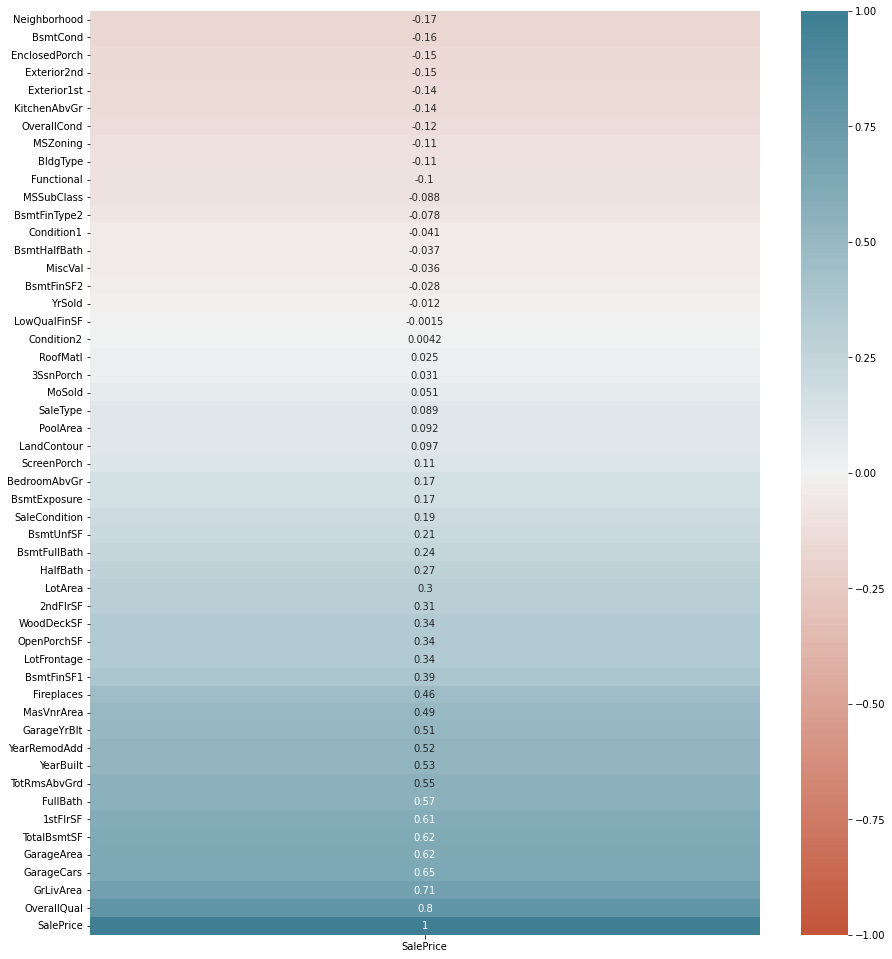

In [ ]:
# Plotando mapa de calor com correlação de calunas não categóricas com SalesPrice
columns = list(set(train_data.columns) - set(features_selecionadas.columns))
correlacoes = train_data.corr()[['SalePrice']]
correlacoes = correlacoes.sort_values('SalePrice')
plt.figure(figsize=(15, 17))
sns.heatmap(correlacoes, vmin=-1, vmax=1, annot=True, center=0,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

Observações do mapa de calor:

* Feature como OverallQual e GarageCars possuem uma correlação positiva forte, sendo ótimas para a criação de modelos de machine learning.
* Para a feature SalePrice, não existem correlações negativas fortes.
* Talvez seja necessário a eliminação de algumas colunas que, pela correlção, provavelmente não afetam o preço das residências.
* Provavelmente irei remover as features que não seguem as seguintes regras:
  * Seja x a correlação com o preço, irei remover as features que não obedecem ao critério:
    * X < - 0.1 ou X > 0.3
  * Features que não seguem o critério acima:
    * 'Functional', 'MSSubClass', 'BsmtFinType2', 'Condition1',
        'BsmtHalfBath', 'MiscVal', 'BsmtFinSF2', 'YrSold', 'LowQualFinSF',
        'Condition2', 'RoofMatl', '3SsnPorch', 'MoSold', 'SaleType', 'PoolArea',
        'LandContour', 'ScreenPorch', 'BedroomAbvGr', 'BsmtExposure',
        'SaleCondition', 'BsmtUnfSF', 'BsmtFullBath', 'HalfBath', 'LotArea',

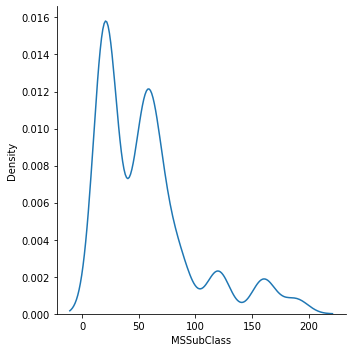

In [ ]:
# distribuição de probabilidade de MSSubClass
sns.displot(data=train_data, x='MSSubClass', kind="kde")
plt.show()

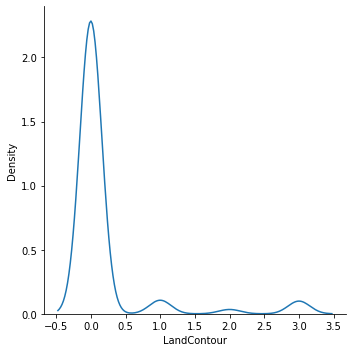

In [ ]:
# distribuição de probabilidade de MSZoning
sns.displot(data=train_data, x='LandContour', kind="kde")
plt.show()

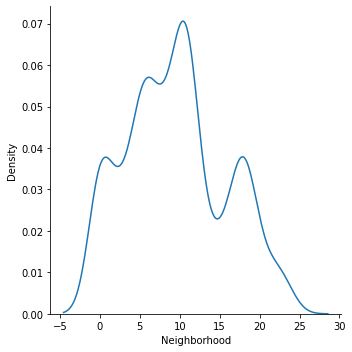

In [ ]:
# distribuição de probabilidade de Neighborhood
sns.displot(data=train_data, x='Neighborhood', kind="kde")
plt.show()

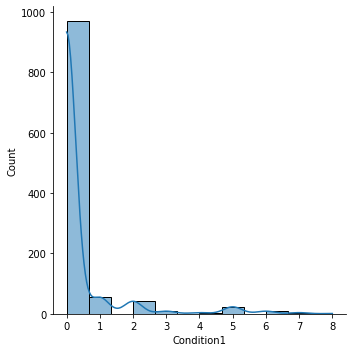

In [ ]:
# gráfico de barras de Condition1
sns.displot(data=train_data, x='Condition1', kde=True)
plt.show()

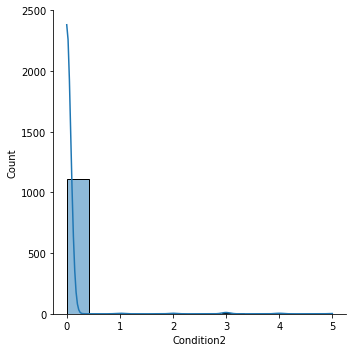

In [ ]:
# gráfico de barras de Condition2
sns.displot(data=train_data, x='Condition2', kde=True)
plt.show()

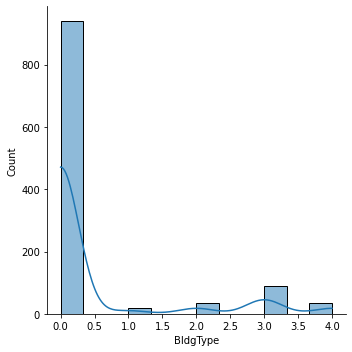

In [ ]:
# gráfico de barras de Condition1
sns.displot(data=train_data, x='BldgType', kde=True)
plt.show()

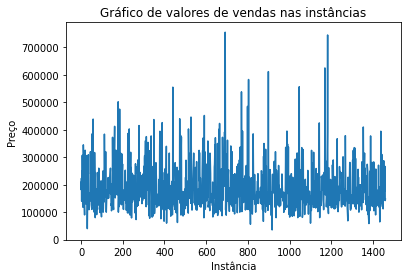

In [ ]:
# plotando o gráfico de valores de vendas nas instâncias
plt.plot(train_data.SalePrice)
plt.xlabel('Instância')
plt.ylabel('Preço')
plt.title('Gráfico de valores de vendas nas instâncias')
plt.show()

Com o gráfico anterior, é possível observar alguns outliers no valor das vendas. Talvez esses valores sejam reflexo de residências super faturadas ou de luxo.

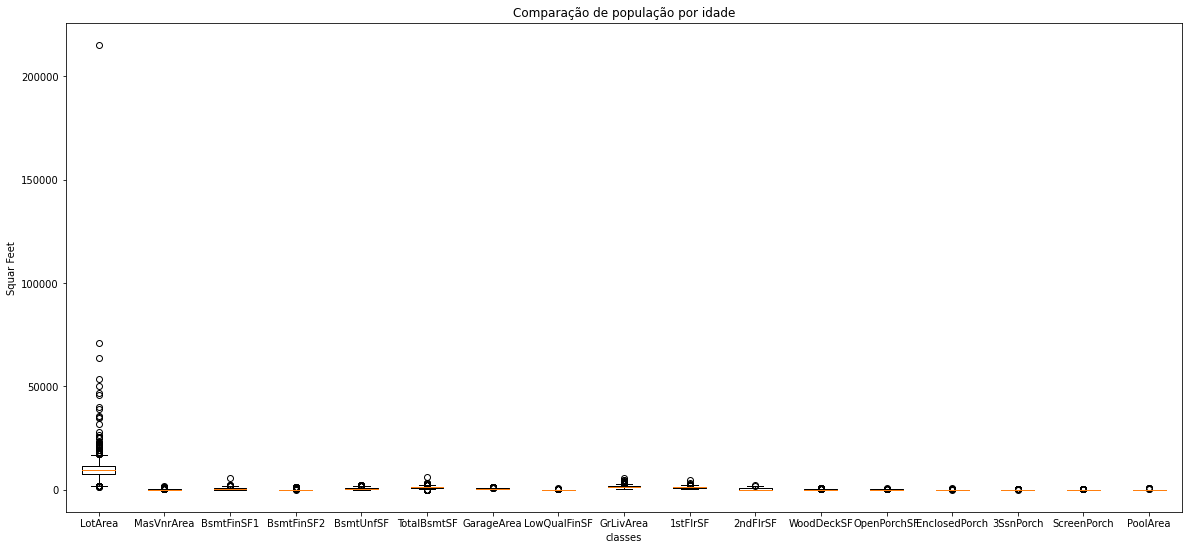

In [38]:
# analisando features medidas em square feet
square_feet_column = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'LowQualFinSF', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
plt.figure(figsize=(20,9)) 
plt.ticklabel_format(useOffset=False, style='plain')
plt.boxplot([train_data[column] for column in square_feet_column], labels=square_feet_column)
plt.title('Comparação de população por idade')
plt.ylabel('Squar Feet')
plt.xlabel('classes')
plt.show()


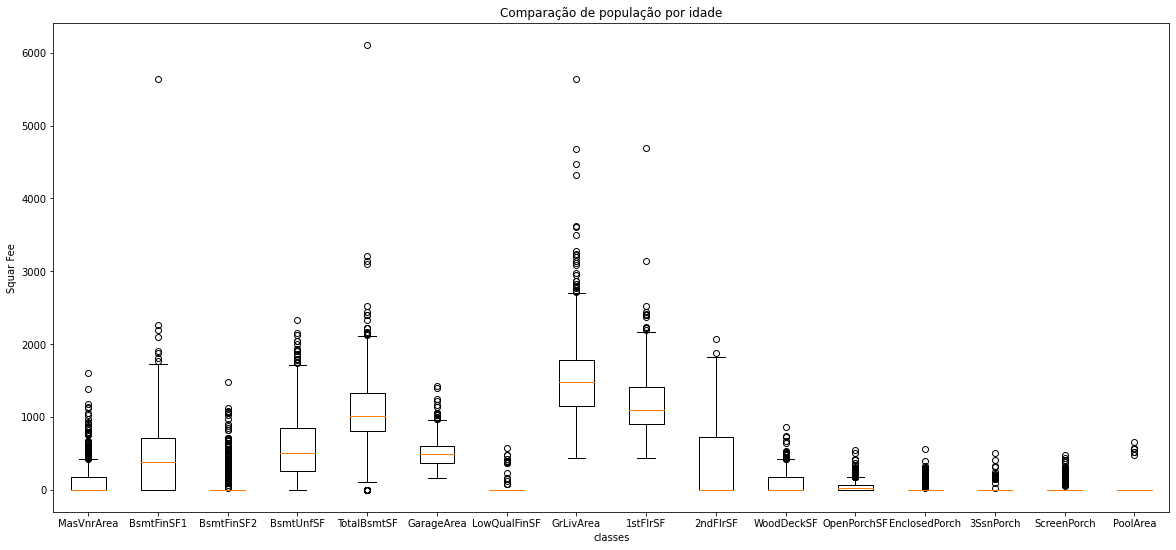

In [39]:
# analisando features medidas em square feet (sem LotArea  para não causar achatamento do gráfico)
square_feet_column = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'LowQualFinSF', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
plt.figure(figsize=(20,9)) 
plt.ticklabel_format(useOffset=False, style='plain')
plt.boxplot([train_data[column] for column in square_feet_column], labels=square_feet_column)
plt.title('Comparação de população por idade')
plt.ylabel('Squar Fee')
plt.xlabel('classes')
plt.show()

Com os dois ultimos gráficos, podemos observar que: 


*   Existem diversos outliers no databse.
*   LotArea, possivelmente, pode substituir a maioria das outras features em square feet.
  * LotArea é o tamanho do lote em square feet.



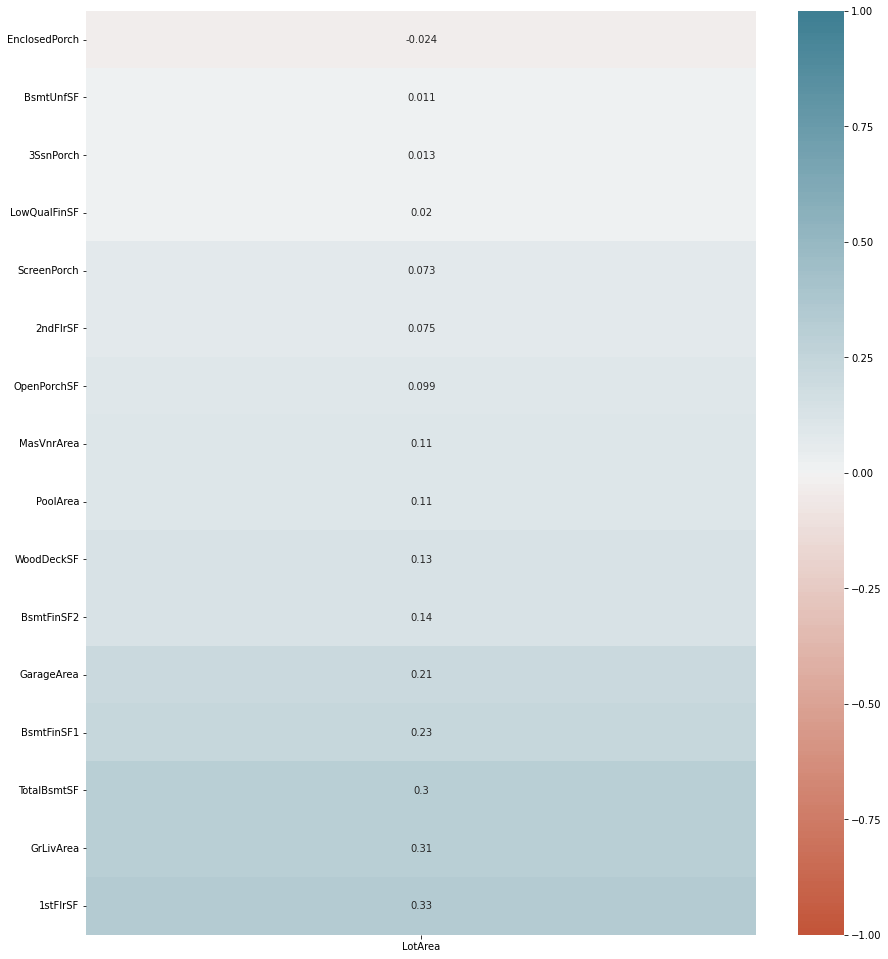

In [ ]:
# Plotando mapa de calor com correlação de calunas não categóricas com SalesPrice
columns = square_feet_column
correlacoes = train_data.corr()[['LotArea']].loc[columns]
correlacoes = correlacoes.sort_values('LotArea')
plt.figure(figsize=(15, 17))
sns.heatmap(correlacoes, vmin=-1, vmax=1, annot=True, center=0,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

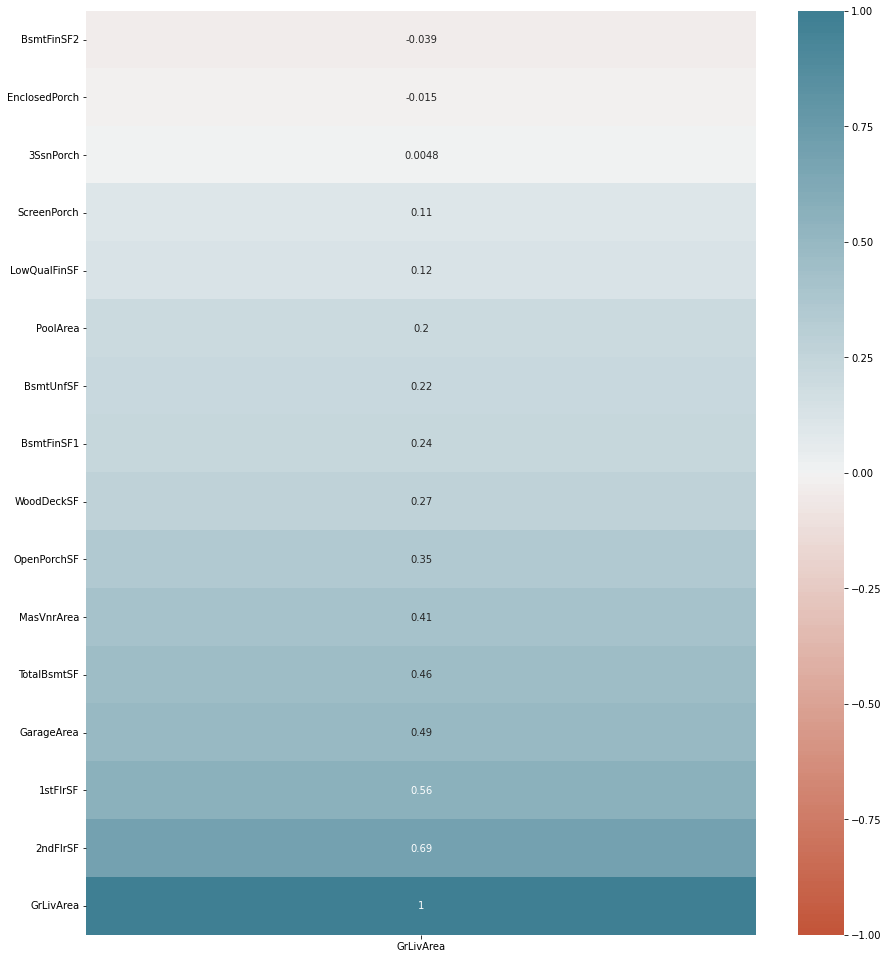

In [ ]:
# Plotando mapa de calor com correlação de calunas não categóricas com SalesPrice
columns = square_feet_column
correlacoes = train_data.corr()[['GrLivArea']].loc[columns]
correlacoes = correlacoes.sort_values('GrLivArea')
plt.figure(figsize=(15, 17))
sns.heatmap(correlacoes, vmin=-1, vmax=1, annot=True, center=0,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

* Como o GrLivArea significa o square feet dos andares de cima, é correto 
afirmar que features como 1ndFlrSF e 2ndFlrSF (que significa a área do segundo andar) terão uma correlação positiva forte com GrLiveArea.
* Provavelmente irei remove-los com o intuito do melhoramento da eficiência do modelo.

Coeficiente de Correlação: 0.5258947807369424


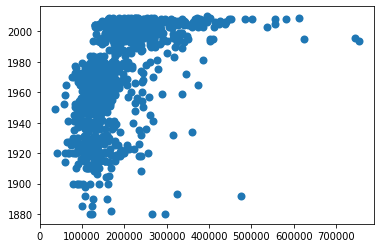

In [ ]:
# plotando correlação entre o preço da residência e o ano de construção

print(f'Coeficiente de Correlação: {train_data.SalePrice.corr(train_data.YearBuilt)}')
plt.scatter(train_data.SalePrice, train_data['YearBuilt'], linewidths=2)
plt.show()

Coeficiente de Correlação: 0.5217004454992669


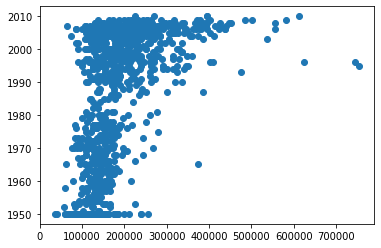

In [ ]:
# plotando correlação entre o preço da residência e o ano de reconstrução e manutenção 
# se não teve reconstrução ou alguma manutenção, a data é a mesma de YearBuilt

print(f'Coeficiente de Correlação: {train_data.SalePrice.corr(train_data.YearRemodAdd)}')
plt.scatter(train_data.SalePrice, train_data['YearRemodAdd'])
plt.show()


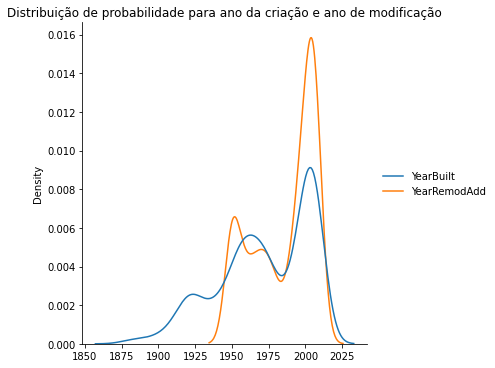

In [ ]:
# Distribuição de probabilidade comparando o ano da criação e ano de modificação
sns.displot([train_data.YearBuilt, train_data.YearRemodAdd], kind='kde')
plt.title('Distribuição de probabilidade para ano da criação e ano de modificação')
plt.show()

* É importante observar que a data de remodelação pode ter sido marcada para um tempo no futuor.
* Eu estava pensando em remover as features que são relacionadas a datas, mas isso ainda exige mais pesquisa.
* É possível ver que o pico de remodelação nas residências ocorre entre 1975 e 2025, provavelmente são das residências anteriores construídas entre 1850 a 1925.

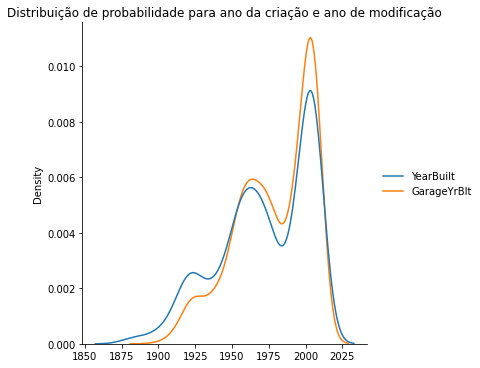

In [ ]:
# Distribuição de probabilidade comparando o ano da criação e ano da construção da garagem

sns.displot([train_data.YearBuilt, train_data.GarageYrBlt], kind='kde')
plt.title('Distribuição de probabilidade para ano da criação e ano de modificação')
plt.show()

Coeficiente de Correlação: 0.823329176688742


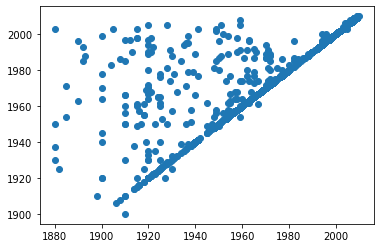

In [ ]:
# plotando correlação entre o ano da criação da residência e e ano da construção da garagem


print(f'Coeficiente de Correlação: {train_data.YearBuilt.corr(train_data.GarageYrBlt)}')
plt.scatter(train_data.YearBuilt, train_data['GarageYrBlt'])
plt.show()


Coeficiente de Correlação: 0.839625753446485


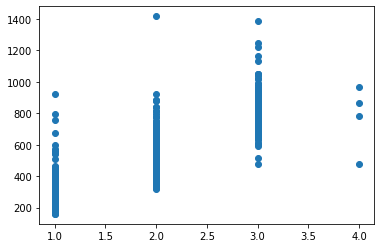

In [ ]:
# plotando correlação entre a quantidade de carros que cabem na garagem e a área da garagem em square feet


print(f'Coeficiente de Correlação: {train_data.GarageCars.corr(train_data.GarageArea)}')
plt.scatter(train_data.GarageCars, train_data['GarageArea'])
plt.show()



Devido a alta correlação com a feature que indica o ano de construção, a data de criação da garagem pode ser removida com o intuito do melhoramento da eficiência do modelo de machine learning.

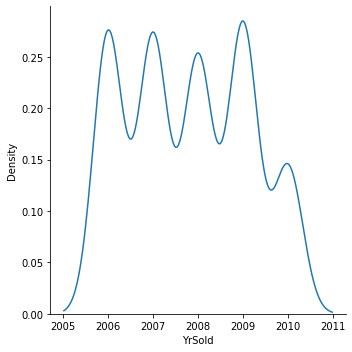

In [ ]:
# gráfico de barras para o ano da venda
sns.displot(data=train_data, x='YrSold', kind="kde")
plt.show()

* A variação das datas de venda das instâncias é entre 2005 a 2011.
* A relaçao entre o preço e o ano da compra dass residencias e importante, pois ele pode detectar coisas como flutuaçoes nos preços, crises economicas, desvalorizaçao da moeda, etc.

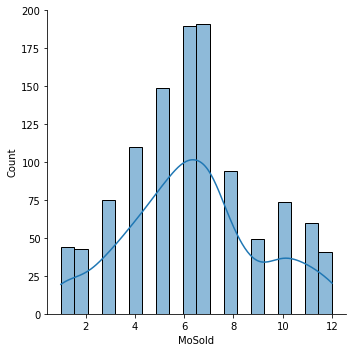

In [ ]:
# gráfico de barras para o mês da venda
sns.displot(data=train_data, x='MoSold', kde=True)
plt.show()

O mẽs com mais vendas nos dados ocorre no mês de Junho, provavelmente deve haver um motivo para isso.

Coeficiente de Correlação: -0.011839530732990777


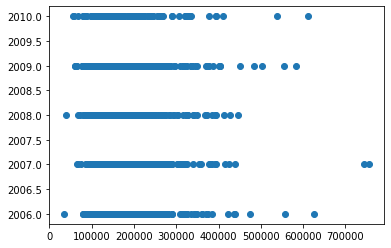

In [41]:
# plotando correlação entre o ano de venda da residência e o preço


print(f'Coeficiente de Correlação: {train_data.SalePrice.corr(train_data.YrSold)}')
plt.scatter(train_data.SalePrice, train_data['YrSold'])
plt.show()


* A correlação entre o preço e o ano de compra foi muito fraca.
* Levando em conta a fraca correlação entre essas features, eu irei remover tanto o ano de venda quanto o mês.

## Organizando dados para modelagem

In [40]:
# mostrando dados
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LandContour,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,7,5,2003,2003,0,0,0,196.0,0,0,706,0,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,1,1,0,0,6,8,1976,1976,0,1,1,0.0,0,1,978,0,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,0,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,0,0,0,0,7,5,2001,2002,0,0,0,162.0,0,2,486,0,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,0,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,2,0,0,0,7,5,1915,1970,0,2,2,0.0,1,0,216,0,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,0,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0,1,140000
4,60,0,84.0,14260,0,3,0,0,0,8,5,2000,2000,0,0,0,350.0,0,3,655,0,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,0,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0,0,250000


In [57]:
# preparando X
X_train = train_data.drop(columns=['SalePrice'])
X.head()

,MSZoning,LotFrontage,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,BsmtCond,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,0,65.0,0,0,7,5,2003,2003,0,0,196.0,0,706,856,1710,2,1,8,0,548,0,61,0
1,0,80.0,1,0,6,8,1976,1976,1,1,0.0,0,978,1262,1262,2,1,6,1,460,298,0,0
2,0,68.0,0,0,7,5,2001,2002,0,0,162.0,0,486,920,1786,2,1,6,1,608,0,42,0
3,0,60.0,2,0,7,5,1915,1970,2,2,0.0,1,216,756,1717,1,1,7,1,642,0,35,272
4,0,84.0,3,0,8,5,2000,2000,0,0,350.0,0,655,1145,2198,2,1,9,1,836,192,84,0


In [58]:
# preparando y
y = train_data['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## Criando e testando modelos 

Irei usar 3 modelos que eu vejo como os melhores para o problema de regressão do case.

Os modelos:
*   Árvore de Decisão (Decision Tree)
*   Random Forest
*   Regressão Linear

Esses algoritmos serão usados para a versão de regressão, com a biblioteca scikit-learn.






### Método Holdout

#### Preparando dados

In [59]:
# separando conjunto de teste e conjunto de treino (método holdout)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#### Treinando e fazendo previsões

In [60]:
# definindo modelo de regressão linear 
linear1 = LinearRegression()
linear1.fit(X_train,y_train)
pred_linear1 = linear1.predict(X_test)

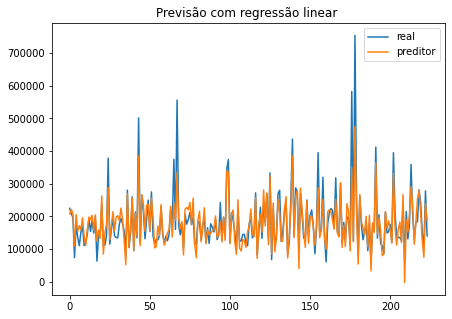

In [62]:
# plotando resultados da MLP

plt.figure(figsize=(15.5,5)) 

plt.subplot(1, 2, 1)
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_linear1,label='preditor')
plt.legend()
plt.title('Previsão com regressão linear ')

plt.show()

In [63]:
# definindo modelo de árvore de decisão 
arvore1 = DecisionTreeRegressor()
arvore1.fit(X_train,y_train)
pred_arvore1 = arvore1.predict(X_test)

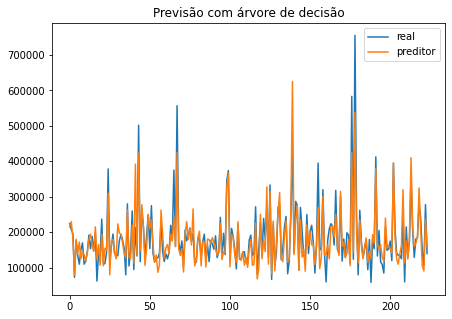

In [65]:
# plotando resultados da árvore de decisão

plt.figure(figsize=(15.5,5)) 


plt.subplot(1, 2, 1) 
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_arvore1,label='preditor')
plt.legend()
plt.title('Previsão com árvore de decisão')

plt.show()

In [68]:
# definindo modelo de random forest
floresta1 = RandomForestRegressor(n_estimators=150)
floresta1.fit(X_train,y_train)
pred_floresta1 = floresta1.predict(X_test)

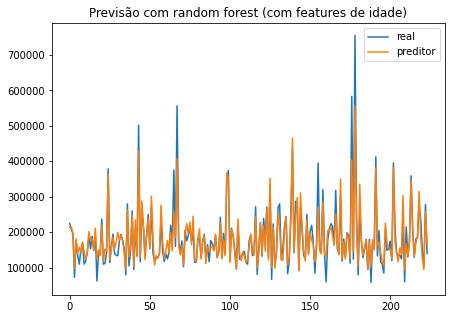

In [69]:
# plotando resultados da random forest

plt.figure(figsize=(15.5,5)) 


plt.subplot(1, 2, 1) 
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_floresta1,label='preditor')
plt.legend()
plt.title('Previsão com random forest')

plt.show()

#### Testando modelos

Os testes usados nos modelos são:



*   Mean Absolute Error (MAE)
*   Mean Squared Error (MSE)
*   Root Mean Squared Error (RMSE)

O resultado desses testes podem ser interpretado como: quanto mais próximo de 0 é o valor, melhor.



##### Mean Absolute Error (MAE)


In [70]:
# MAE Linear
mael1 = mean_absolute_error(y_test,pred_linear1)

In [71]:
# MAE Árvore
maea1 = mean_absolute_error(y_test,pred_arvore1)

In [72]:
# Mae Random Forest
maer1 = mean_absolute_error(y_test,pred_floresta1)

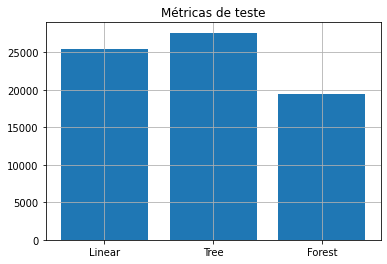

In [79]:
#  Gráfico de barras mostrando resultados

labels = ['Linear', 'Tree', 'Forest']
mae = [mael1, maea1, maer1]
plt.bar(labels, mae)
plt.title('Métricas de teste')
plt.grid(True)
plt.show()

##### Mean Squared Error (MSE)


In [82]:
# MSE linear
msel1 = mean_squared_error(y_test,pred_linear1)

In [83]:
# MSE arvore
msea1 = mean_squared_error(y_test,pred_arvore1)

In [84]:
# MSE random forest
mser1 = mean_squared_error(y_test,pred_floresta1)

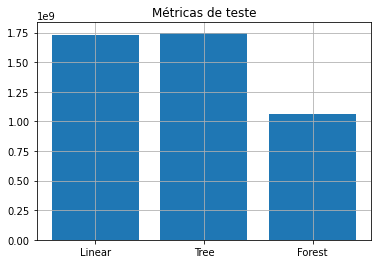

In [85]:
#  Gráfico de barras mostrando resultados

labels = ['Linear', 'Tree', 'Forest']
se = [msel1, msea1, mser1]
plt.bar(labels, se)
plt.title('Métricas de teste')
plt.grid(True)
plt.show()

##### Root Mean Squared Error (RMSE)

In [87]:
# RMSE para regressão linear
rmsel1 = mean_squared_error(y_test,pred_linear1)**(1/2)

In [88]:
# RMSE para árvore de decisão
rmsea1 = mean_squared_error(y_test,pred_arvore1)**(1/2)

In [89]:
# RMSE para random forest
rmser1 = mean_squared_error(y_test,pred_floresta1)**(1/2)

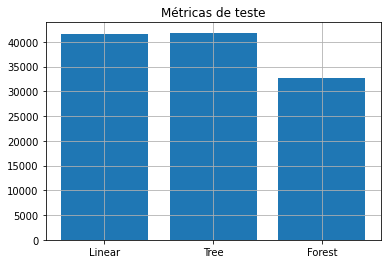

In [90]:
#  Gráfico de barras mostrando resultados

labels = ['Linear', 'Tree', 'Forest']
rmse = [rmsel1, rmsea1, rmser1]
plt.bar(labels, rmse)
plt.title('Métricas de teste')
plt.grid(True)
plt.show()


## Conclusões

*   Com o método holdout, o modelo mais promissor foi o de Randon Forest, trazendo resultados melhores comparados aos outros dois modelos testados, Árvore de Decisão e Regressão Linear.
*   Apesar dos modelos terem bons resultados para os dados mais "estáveis", não conseguiram prever eficientemente os outliers, tanto pra cima quanto pra baixo, segundo os gráficos de resultados da previsões plotados na parte "Treinando e fazendo previsõe".
*   Para a melhora dos resultados, é possível fazer:
  *   Tratamento dos outliers.
  *   Maior pesquisa em relação as features, pois são muitas.

